In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import skew
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#データの読み込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.shape

(1459, 80)

In [4]:
train.shape

(1460, 81)

In [5]:
#欠損値の多いものは削除
train = train.drop(columns=["YearRemodAdd","PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage","LotFrontage"])
test = test.drop(columns=["YearRemodAdd","PoolQC","MiscFeature","Alley","Fence" ,"FireplaceQu" ,"LotFrontage","LotFrontage"])

In [6]:
train.shape

(1460, 74)

In [7]:
test.shape

(1459, 73)

In [8]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# train.isnull().sum()

In [10]:
# # ランダムフォレストをインポート
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=80, max_features='auto')
# rf.fit(X_train, y_train)
# print("Training done using Random Forest")
# ranking = np.argsort(-rf.feature_importances_)
# f, ax = plt.subplots(figsize=(30, 30))
# sns.barplot(x=rf.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
# ax.set_xlabel("feature importance")
# plt.tight_layout()
# plt.show()

In [11]:
# train['YearBuilt'].sort_values(ascending=False)

In [12]:
s1 = pd.Series(train.columns)
train.columns[s1.str.contains("Y")]

Index(['YearBuilt', 'GarageYrBlt', 'YrSold'], dtype='object')

In [13]:
s2 = pd.Series(train.columns)
train.columns[s2.str.contains("Bs")]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [14]:
train.loc[:,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
3,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0


In [15]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
#何年に建ったかより、築年数の方が重要のはず
train['YearSinceBuilt'] = 2011 - train['YearBuilt']
#何年に売れたかより、売れてから経過している年数の方が重要のはず
train['YrSinceSold'] = 2011 - train['YrSold']
train['GaragesinceYrBlt']  =2011 - train["GarageYrBlt"]

In [16]:

test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]
#何年に建ったかより、築年数の方が重要のはず
test['YearSinceBuilt'] = 2011 - test['YearBuilt']
#何年に売れたかより、売れてから経過している年数の方が重要のはず
test['YrSinceSold'] = 2011 - test['YrSold']
test['GaragesinceYrBlt']  =2011 - test["GarageYrBlt"]

In [17]:
train.loc[:,['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'TotalSF', 'YearSinceBuilt',
       'YrSinceSold', 'GaragesinceYrBlt']]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF,YearSinceBuilt,YrSinceSold,GaragesinceYrBlt
0,1,60,8450,7,5,2003,196.0,706,0,150,...,0,0,0,2,2008,208500,2566,8,3,8.0
1,2,20,9600,6,8,1976,0.0,978,0,284,...,0,0,0,5,2007,181500,2524,35,4,35.0
2,3,60,11250,7,5,2001,162.0,486,0,434,...,0,0,0,9,2008,223500,2706,10,3,10.0
3,4,70,9550,7,5,1915,0.0,216,0,540,...,0,0,0,2,2006,140000,2473,96,5,13.0
4,5,60,14260,8,5,2000,350.0,655,0,490,...,0,0,0,12,2008,250000,3343,11,3,11.0
5,6,50,14115,5,5,1993,0.0,732,0,64,...,0,0,700,10,2009,143000,2158,18,2,18.0
6,7,20,10084,8,5,2004,186.0,1369,0,317,...,0,0,0,8,2007,307000,3380,7,4,7.0
7,8,60,10382,7,6,1973,240.0,859,32,216,...,0,0,350,11,2009,200000,3197,38,2,38.0
8,9,50,6120,7,5,1931,0.0,0,0,952,...,0,0,0,4,2008,129900,2726,80,3,80.0
9,10,190,7420,5,6,1939,0.0,851,0,140,...,0,0,0,1,2008,118000,2068,72,3,72.0


In [18]:
train.drop(['1stFlrSF',"TotalBsmtSF","2ndFlrSF",'GarageArea','TotRmsAbvGrd','YearBuilt','YrSold','GarageYrBlt','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)
test.drop(['1stFlrSF',"TotalBsmtSF","2ndFlrSF",'GarageArea','TotRmsAbvGrd','YearBuilt','YrSold','GarageYrBlt','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,YearSinceBuilt,YrSinceSold,GaragesinceYrBlt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,2566,8,3,8.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,2524,35,4,35.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,2706,10,3,10.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,2473,96,5,13.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,3343,11,3,11.0


In [20]:
s3 = pd.Series(train.columns)
train.columns[s3.str.contains("Ar")]

Index(['LotArea', 'MasVnrArea', 'GrLivArea', 'PoolArea'], dtype='object')

In [21]:
train.loc[:,['LotArea', 'MasVnrArea', 'GrLivArea', 'PoolArea']].head()

,LotArea,MasVnrArea,GrLivArea,PoolArea
0,8450,196.0,1710,0
1,9600,0.0,1262,0
2,11250,162.0,1786,0
3,9550,0.0,1717,0
4,14260,350.0,2198,0


In [22]:
train["Area"]=train["LotArea"]+train["MasVnrArea"]+train["PoolArea"]

In [23]:
train.drop(['LotArea', 'MasVnrArea', 'PoolArea'], axis=1, inplace=True)
test.drop(['LotArea', 'MasVnrArea', 'PoolArea'], axis=1, inplace=True)

In [24]:
train.shape

(1460, 58)

In [25]:
s4 = pd.Series(train.columns)
train.columns[s4.str.contains("Po")]

Index(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], dtype='object')

In [26]:
train["Porch"]=train['OpenPorchSF']+train['EnclosedPorch']+train['3SsnPorch']+ train['ScreenPorch']

In [27]:
train.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)
test.drop(['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], axis=1, inplace=True)

In [28]:
# train = train.loc[:,[]]
np.abs(train.corr()["SalePrice"]).sort_values(ascending=False).head(10)

SalePrice           1.000000
OverallQual         0.790982
TotalSF             0.782260
GrLivArea           0.708624
GarageCars          0.640409
FullBath            0.560664
YearSinceBuilt      0.522897
GaragesinceYrBlt    0.486362
Fireplaces          0.466929
WoodDeckSF          0.324413
Name: SalePrice, dtype: float64

In [29]:
train.describe()

,Id,MSSubClass,OverallQual,OverallCond,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,WoodDeckSF,MiscVal,MoSold,SalePrice,TotalSF,YearSinceBuilt,YrSinceSold,GaragesinceYrBlt,Area,Porch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1452.000000,1460.000000
mean,730.500000,56.897260,6.099315,5.575342,5.844521,1515.463699,1.565068,0.382877,2.866438,1.046575,...,94.244521,43.489041,6.321918,180921.195890,2567.048630,39.732192,3.184247,32.493836,10613.735537,87.084932
std,421.610009,42.300571,1.382997,1.112799,48.623081,525.480383,0.550916,0.502885,0.815778,0.220338,...,125.338794,496.123024,2.703626,79442.502883,821.714421,30.202904,1.328095,24.689725,10013.263982,105.190364
min,1.000000,20.000000,1.000000,1.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,34900.000000,334.000000,1.000000,1.000000,1.000000,1300.000000,0.000000
25%,365.750000,20.000000,5.000000,5.000000,0.000000,1129.500000,1.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,5.000000,129975.000000,2009.500000,11.000000,2.000000,9.000000,7578.750000,0.000000
50%,730.500000,50.000000,6.000000,5.000000,0.000000,1464.000000,2.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,6.000000,163000.000000,2474.000000,38.000000,3.000000,31.000000,9585.000000,48.000000
75%,1095.250000,70.000000,7.000000,6.000000,0.000000,1776.750000,2.000000,1.000000,3.000000,1.000000,...,168.000000,0.000000,8.000000,214000.000000,3004.000000,57.000000,4.000000,50.000000,11746.750000,136.000000
max,1460.000000,190.000000,10.000000,9.000000,572.000000,5642.000000,3.000000,2.000000,8.000000,3.000000,...,857.000000,15500.000000,12.000000,755000.000000,11752.000000,139.000000,5.000000,111.000000,215245.000000,1027.000000


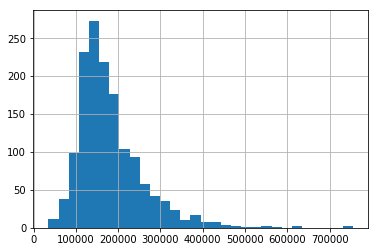

In [30]:
train["SalePrice"].hist(bins=30)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


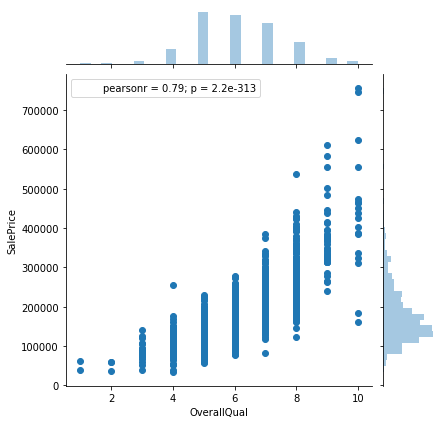

In [31]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [32]:
train = train[(train['SalePrice'] < 700000)]


In [33]:
# sns.jointplot("OverallQual","SalePrice",data= train)

In [34]:
# sns.jointplot("GrLivArea","SalePrice",data= train)

In [35]:
# sns.jointplot("GrLivArea","OverallQual",data= train)

In [36]:
train = train[~((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000))]

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


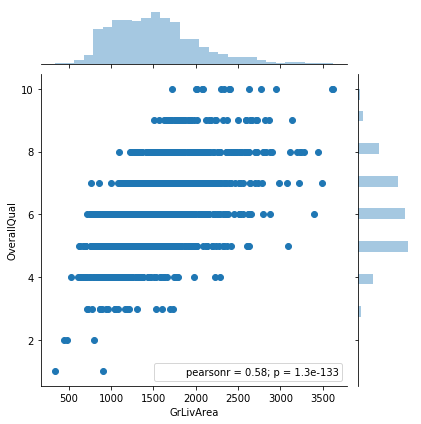

In [37]:
sns.jointplot("GrLivArea","OverallQual",data= train)

In [38]:
# sns.pairplot(train.loc[:,["OverallQual","GrLivArea","YearSinceBuilt","TotalSF","SalePrice"]])

In [39]:
# sns.jointplot("GrLivArea","SalePrice",data= train)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


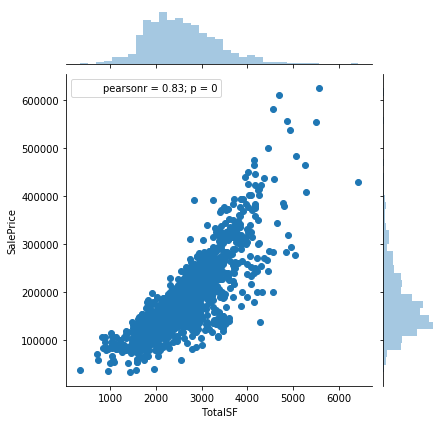

In [40]:
sns.jointplot("TotalSF","SalePrice",data= train)

In [41]:
# sns.jointplot("YearSinceBuilt","SalePrice",data= train)

In [42]:
train.head()

,Id,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,YearSinceBuilt,YrSinceSold,GaragesinceYrBlt,Area,Porch
0,1,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,WD,Normal,208500,2566,8,3,8.0,8646.0,61
1,2,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,5,WD,Normal,181500,2524,35,4,35.0,9600.0,0
2,3,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,9,WD,Normal,223500,2706,10,3,10.0,11412.0,42
3,4,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,2,WD,Abnorml,140000,2473,96,5,13.0,9550.0,307
4,5,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,12,WD,Normal,250000,3343,11,3,11.0,14610.0,84


In [43]:
print(train.shape)
print(test.shape)

(1456, 55)
(1459, 52)


In [44]:
all = pd.concat([train,test],axis = 0)
all = pd.get_dummies(all)

all.shape


C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2915, 231)

In [45]:
train =all.iloc[:1456]
test = all.iloc[1456:2916]

In [46]:
print(train.shape)
print(test.shape)

(1456, 231)
(1459, 231)


In [47]:
train.head()

,Area,BedroomAbvGr,Fireplaces,FullBath,GarageCars,GaragesinceYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,8646.0,3,0,2,2.0,8.0,1710,1,1,1,...,0,0,0,0,0,1,0,1,1,0
1,9600.0,3,1,2,2.0,35.0,1262,0,2,1,...,0,0,0,0,0,1,0,1,1,0
2,11412.0,3,1,2,2.0,10.0,1786,1,3,1,...,0,0,0,0,0,1,0,1,1,0
3,9550.0,3,1,1,3.0,13.0,1717,0,4,1,...,0,0,0,0,0,1,0,1,1,0
4,14610.0,4,1,2,3.0,11.0,2198,1,5,1,...,0,0,0,0,0,1,0,1,1,0


In [48]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [49]:
print(train.shape)
print(test.shape)

(1456, 231)
(1459, 231)


In [50]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

SalePrice    1459
Porch        1459
Area         1459
dtype: int64

In [51]:
train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False)

Series([], dtype: int64)

In [52]:
train.head()

,Area,BedroomAbvGr,Fireplaces,FullBath,GarageCars,GaragesinceYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,8646.0,3,0,2,2.0,8.0,1710,1,1,1,...,0,0,0,0,0,1,0,1,1,0
1,9600.0,3,1,2,2.0,35.0,1262,0,2,1,...,0,0,0,0,0,1,0,1,1,0
2,11412.0,3,1,2,2.0,10.0,1786,1,3,1,...,0,0,0,0,0,1,0,1,1,0
3,9550.0,3,1,1,3.0,13.0,1717,0,4,1,...,0,0,0,0,0,1,0,1,1,0
4,14610.0,4,1,2,3.0,11.0,2198,1,5,1,...,0,0,0,0,0,1,0,1,1,0


In [53]:
test_id = test["Id"]

In [54]:
test_id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [55]:
train = np.log1p(train)
test = np.log1p(test)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


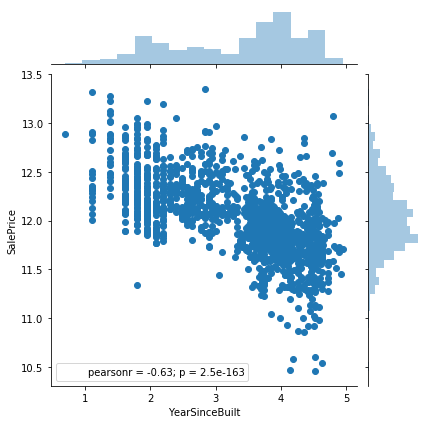

In [56]:
sns.jointplot("YearSinceBuilt","SalePrice",data= train)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


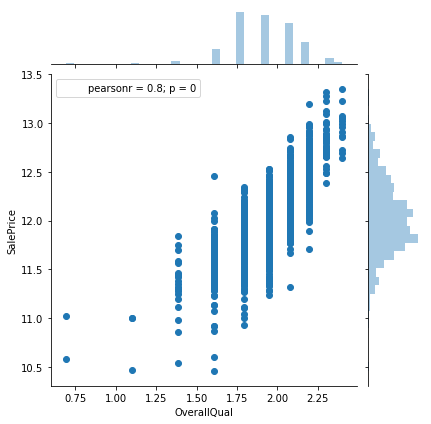

In [57]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [58]:
# train["OverallQual"][train["OverallQual"]<1.25]=1.25

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


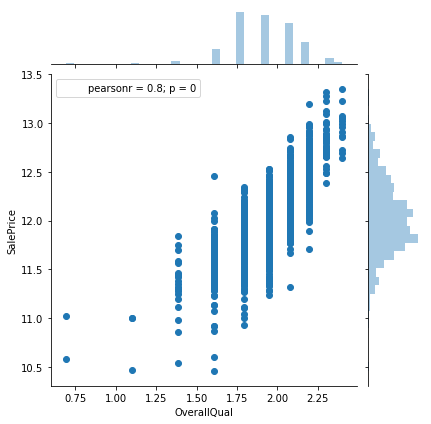

In [59]:
sns.jointplot("OverallQual","SalePrice",data= train)

In [60]:
# train["SalePrice"][train["SalePrice"]<11]*=1.05


In [61]:
# sns.jointplot("OverallQual","SalePrice",data= train)

C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yutaw\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


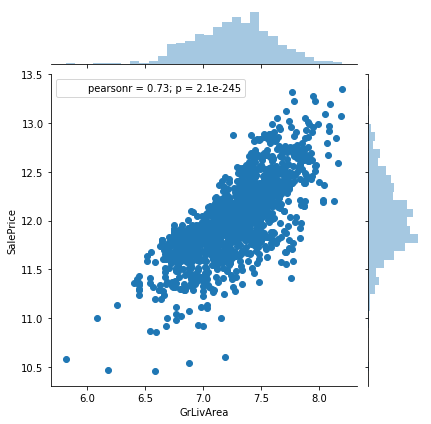

In [62]:
sns.jointplot("GrLivArea","SalePrice",data= train)

In [63]:
test.shape

(1459, 231)

In [64]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

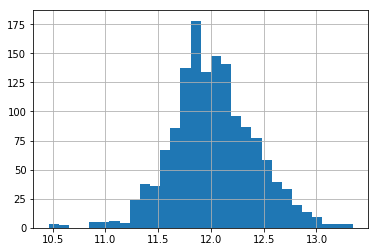

In [65]:
# train["SalePrice"].hist(bins=30)

In [66]:
# train[train["SalePrice"]>13]

In [67]:
from sklearn.model_selection import train_test_split

X = train.loc[:,train.columns != "SalePrice"]
y = train.loc[:, ['SalePrice']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [68]:
X.shape

(1456, 230)

In [69]:
test.shape

(1459, 231)

In [70]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.0005)
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
print("ラッソ回帰でのRMSE:",np.sqrt(mean_squared_error(reg.predict(X_test), y_test)))

ラッソ回帰でのRMSE: 0.11064420921857196


In [71]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

SalePrice    1459
Porch        1459
Area         1459
dtype: int64

In [72]:
test.head()

,Area,BedroomAbvGr,Fireplaces,FullBath,GarageCars,GaragesinceYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,NaN,1.098612,0.000000,0.693147,0.693147,3.931826,6.799056,0.000000,7.287561,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
1,NaN,1.386294,0.000000,0.693147,0.693147,3.988984,7.192934,0.693147,7.288244,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
2,NaN,1.386294,0.693147,1.098612,1.098612,2.708050,7.396335,0.693147,7.288928,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
3,NaN,1.386294,0.693147,1.098612,1.098612,2.639057,7.380879,0.693147,7.289611,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
4,NaN,1.098612,0.000000,1.098612,1.098612,2.995732,7.155396,0.000000,7.290293,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0


In [73]:
test = test.loc[:,test.columns != "SalePrice"]

In [74]:
test.head()

,Area,BedroomAbvGr,Fireplaces,FullBath,GarageCars,GaragesinceYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,NaN,1.098612,0.000000,0.693147,0.693147,3.931826,6.799056,0.000000,7.287561,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
1,NaN,1.386294,0.000000,0.693147,0.693147,3.988984,7.192934,0.693147,7.288244,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
2,NaN,1.386294,0.693147,1.098612,1.098612,2.708050,7.396335,0.693147,7.288928,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
3,NaN,1.386294,0.693147,1.098612,1.098612,2.639057,7.380879,0.693147,7.289611,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0
4,NaN,1.098612,0.000000,1.098612,1.098612,2.995732,7.155396,0.000000,7.290293,0.693147,...,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.693147,0.693147,0.0


In [75]:
print(test.shape)

(1459, 230)


In [76]:
test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

Porch    1459
Area     1459
dtype: int64

In [77]:
# y_test_pred = np.exp(reg.predict(test))
# test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_test_pred 

In [ ]:
# print(test.shape)
# print(test_id.shape)
# print(y_test_pred.shape)

In [ ]:
submission = pd.DataFrame({"Id":test_id,"SalePrice": y_test_pred})
# submission.to_csv('submission6.csv', index=False)